In [69]:
conda -V

conda 4.13.0

Note: you may need to restart the kernel to use updated packages.


In [70]:
conda list

# packages in environment at C:\Data_Projects\d208\env:
#
# Name                    Version                   Build  Channel
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0          py310h2bbff1b_0  
asttokens                 2.0.5              pyhd3eb1b0_0  
attrs                     21.4.0             pyhd3eb1b0_0  
backcall                  0.2.0              pyhd3eb1b0_0  
beautifulsoup4            4.11.1          py310haa95532_0  
blas                      1.0                         mkl  
bleach                    4.1.0              pyhd3eb1b0_0  
bottleneck                1.3.5           py310h9128911_0  
brotli                    1.0.9                h2bbff1b_7  
brotli-bin                1.0.9                h2bbff1b_7  
bzip2                     1.0.8                he774522_0  
ca-certificates           2022.07.19           haa95532_0  
certifi                   2022.6.15       py310haa95532_0  
cffi                      1.15.1   

# Part I: Research Question

### Which independent variables are related to readmissions?

# Part III: Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
sns.set_theme(style='darkgrid')
plt.rcParams['figure.dpi'] = 125

In [3]:
df = pd.read_csv('medical_clean.csv', index_col=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Mari

In [5]:
with pd.option_context('display.max_rows', 6, 'display.max_columns', None): 
    display(df)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.40342,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.99812,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.19246,2,4,4,4,3,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3,45,65917.81,Separated,Female,Yes,17.129070,4,2,0,Yes,Elective Admission,Yes,No,High,Yes,No,No,No,No,Yes,Yes,No,No,Intravenous,70.154180,8276.481000,15281.21000,3,3,3,4,4,2,3,2
9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01590,271,Rural,America/Denver,Outdoor activities/education manager,3,43,29702.32,Divorced,Male,Yes,19.910430,5,2,1,No,Emergency Admission,No,No,Medium,Yes,No,No,No,Yes,No,No,No,No,Blood Work,63.356900,7644.483000,7781.67800,5,5,3,4,4,3,4,3
10000,I569847,bc482c02-f8c9-4423-99de-3db5e62a18d5,95663a202338000abdf7e09311c2a8a1,Coraopolis,PA,Allegheny,15108,40.49998,-80.19959,41524,Urban,America/New_York,Sports development officer,8,70,62682.63,Separated,Female,Yes,18.388620,5,0,1,No,Observation Admission,No,No,Low,Yes,Yes,No,Yes,No,No,Yes,No,No,Blood Work,70.850590,7887.553000,11643.19000,4,3,3,2,3,6,4,3


## Renaming columns

In [6]:
df = df.rename(columns={'ReAdmis': 'Re_admis', 'HighBlood': 'High_blood', 'BackPain': 'Back_pain', 
                        'TotalCharge': 'Total_charge', 'TimeZone' : 'Time_zone'})

In [7]:
survey_names = {'Item8': 'Active_listening', 'Item7': 'Courteous_staff',
                'Item6': 'Treatment_hours', 'Item5': 'Options',
                'Item4': 'Reliability', 'Item3': 'Timely_visits',
                'Item2': 'Timely_treatment', 'Item1': 'Timely_admission'}
df.rename(columns=survey_names, inplace=True)

## Querying for 0's

In [8]:
df.loc[:, df.eq(0).any()]

,Population,Children,Full_meals_eaten,vitD_supp
CaseOrder,,,,
1,2951,1,0,0
2,11303,3,2,1
3,17125,3,1,0
4,2162,0,1,0
5,5287,1,0,2
...,...,...,...,...
9996,4762,2,2,1
9997,1251,4,0,0
9998,532,3,2,0


## Checking for input errors in the survey columns

In [9]:
item_columns = df.iloc[: , -8:]
item_columns.loc[: , ~item_columns.isin(range(1,8)).any()]

""
CaseOrder
1
2
3
4
5
...
9996
9997
9998


## Converting string fields to integers

### Binary columns

In [10]:
binary_columns = ['Re_admis', 'Soft_drink', 'High_blood', 'Stroke',
                  'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia',
                 'Back_pain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis',
                 'Asthma', ]
df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0}).astype('uint8')
display(df[binary_columns])

,Re_admis,Soft_drink,High_blood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,Back_pain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma
CaseOrder,,,,,,,,,,,,,
1,0,0,1,0,0,1,1,0,1,1,1,0,1
2,0,0,1,0,1,0,0,0,0,0,0,1,0
3,0,0,1,0,1,0,1,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,1,1
5,0,1,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0,0,1,0,0,0,0,0,0,1,0,1,0
9997,1,0,1,0,1,1,1,0,0,0,0,0,1
9998,1,1,1,0,1,0,0,0,0,1,1,0,0


### Recoding 'Complication_risk'

In [11]:
df.Complication_risk = df.Complication_risk.replace({'Low': 1, 'Medium': 2, 'High': 3}).astype('int')

## Reducing the cardinality of survey columns

In [12]:
for i in range(1,9):
    df.iloc[:, -i] = np.ceil(df.iloc[:, -i].div(2)).astype('int')

## One-hot encoding

In [13]:
df.Area.unique()

array(['Suburban', 'Urban', 'Rural'], dtype=object)

In [14]:
df.Gender.unique()

array(['Male', 'Female', 'Nonbinary'], dtype=object)

In [15]:
df.Initial_admin.unique()

array(['Emergency Admission', 'Elective Admission',
       'Observation Admission'], dtype=object)

In [16]:
df.Services.unique()

array(['Blood Work', 'Intravenous', 'CT Scan', 'MRI'], dtype=object)

In [17]:
df.Marital.unique()

array(['Divorced', 'Married', 'Widowed', 'Never Married', 'Separated'],
      dtype=object)

### Area

In [18]:
area_dummies = pd.get_dummies(df['Area'])
display(area_dummies)

,Rural,Suburban,Urban
CaseOrder,,,
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0
5,1,0,0
...,...,...,...
9996,0,0,1
9997,0,0,1
9998,1,0,0


In [19]:
df = pd.concat([df, area_dummies], axis=1)
df.drop(['Area', 'Rural'], inplace=True, axis=1)

### Gender

In [20]:
gender_dummies = pd.get_dummies(df['Gender'])
display(gender_dummies)

,Female,Male,Nonbinary
CaseOrder,,,
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0
5,1,0,0
...,...,...,...
9996,0,1,0
9997,0,1,0
9998,1,0,0


In [21]:
df = pd.concat([df, gender_dummies], axis=1)
df.drop(['Gender', 'Male'], inplace=True, axis=1)

### Initial_admin

In [22]:
admin_dummies = pd.get_dummies(df['Initial_admin'])
display(admin_dummies)

,Elective Admission,Emergency Admission,Observation Admission
CaseOrder,,,
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
5,1,0,0
...,...,...,...
9996,0,1,0
9997,1,0,0
9998,1,0,0


In [23]:
admin_dummies.rename(columns={'Elective Admission': 'Elective_admission',
                             'Observation Admission': 'Observation_admission'}, inplace=True)
df = pd.concat([df, admin_dummies], axis=1)
df.drop(['Initial_admin', 'Emergency Admission'], inplace=True, axis=1)

### Services

In [24]:
services_dummies = pd.get_dummies(df['Services'])
display(services_dummies)

,Blood Work,CT Scan,Intravenous,MRI
CaseOrder,,,,
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0
5,0,1,0,0
...,...,...,...,...
9996,0,0,1,0
9997,0,1,0,0
9998,0,0,1,0


In [25]:
services_dummies.rename(columns={'Blood Work': 'Blood_work'}, inplace=True)
df = pd.concat([df, services_dummies], axis=1)
df.drop(['Services', 'CT Scan'], inplace=True, axis=1)

## Imputing missing 'Population' values

In [26]:
df.Population = df.Population.replace(0, np.nan)
df.Population.isna().sum()

109

In [27]:
df.Population = df.sort_values(by='Zip').Population.fillna(method='bfill')
df.Population.isna().sum()

0

## Exporting Prepared Dataset

In [28]:
df.to_csv('prepared_data_PA2.csv')

## Correlation Matrix

In [29]:
# Moving 'Re_admis' to the front of the column list
cols = df.columns.tolist()
tenure_index = cols.index('Re_admis')
cols.insert(0, cols.pop(tenure_index))
df= df[cols]

In [30]:
new_matrix = df.corr().abs().sort_values(by='Re_admis', ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(new_matrix)

,Re_admis,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,High_blood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,Back_pain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,Total_charge,Additional_charges,Timely_admission,Timely_treatment,Timely_visits,Reliability,Options,Treatment_hours,Courteous_staff,Active_listening,Suburban,Urban,Female,Nonbinary,Elective_admission,Observation_admission,Blood_work,Intravenous,MRI
Re_admis,1.000000,0.008218,0.014365,0.001217,0.018951,0.023532,0.015810,0.011504,0.004083,0.000246,0.012172,0.011039,0.007703,0.002270,0.000918,0.003236,0.008586,0.007663,0.003058,0.004307,0.013313,0.002406,0.004651,0.005422,0.017133,0.850862,0.843726,0.013620,0.015552,0.005057,0.008020,0.001821,0.006244,0.014218,0.003703,0.016314,0.000421,0.007116,0.011663,0.006428,0.010880,0.011972,0.000718,0.020313,0.009309
Initial_days,0.850862,0.013568,0.008820,0.009292,0.015674,0.022467,0.016264,0.012465,0.003642,0.006754,0.017267,0.015974,0.002432,0.006333,0.002043,0.014294,0.011077,0.018907,0.002411,0.003974,0.017344,0.011908,0.003635,0.012237,0.013496,1.000000,0.987640,0.004409,0.022026,0.007231,0.008771,0.008452,0.003766,0.008314,0.003355,0.006094,0.000311,0.010951,0.007912,0.004196,0.010040,0.003085,0.006272,0.015430,0.007692
Total_charge,0.843726,0.012904,0.010759,0.008830,0.017061,0.024100,0.016876,0.014345,0.001403,0.005043,0.014306,0.016924,0.005463,0.019910,0.003694,0.061834,0.012782,0.032932,0.011524,0.017565,0.035828,0.031199,0.018919,0.026284,0.014290,0.987640,1.000000,0.029256,0.019610,0.006320,0.007482,0.007655,0.002811,0.006778,0.005995,0.006736,0.000456,0.012501,0.006448,0.005890,0.057207,0.066870,0.005271,0.016170,0.007341
Children,0.023532,0.011065,0.006373,0.014114,0.001222,1.000000,0.009836,0.007176,0.009487,0.002292,0.003835,0.004319,0.008426,0.001923,0.005123,0.003681,0.013594,0.007871,0.022479,0.002909,0.007785,0.008362,0.019207,0.005639,0.002324,0.022467,0.024100,0.013548,0.003501,0.000699,0.002487,0.008004,0.013520,0.002191,0.009733,0.015792,0.020453,0.013862,0.004645,0.001853,0.004202,0.006437,0.009050,0.010741,0.005061
Intravenous,0.020313,0.001295,0.013775,0.001152,0.001064,0.010741,0.004142,0.006678,0.001984,0.008700,0.016177,0.011475,0.003958,0.008408,0.019871,0.000612,0.004074,0.001198,0.001937,0.003848,0.013446,0.007251,0.003766,0.022007,0.013559,0.015430,0.016170,0.001095,0.004230,0.013926,0.012577,0.003105,0.011148,0.005440,0.009592,0.006323,0.012053,0.000385,0.008353,0.008914,0.006347,0.010817,0.711759,1.000000,0.134152
Population,0.018951,0.030385,0.208090,0.031353,1.000000,0.001222,0.023079,0.005251,0.000204,0.012682,0.026439,0.011806,0.001882,0.008195,0.002481,0.015229,0.002344,0.000809,0.009511,0.008248,0.007217,0.013464,0.009464,0.016844,0.004132,0.015674,0.017061,0.008415,0.009061,0.026882,0.001247,0.002020,0.005543,0.009821,0.004698,0.000634,0.017781,0.006379,0.008602,0.010667,0.013592,0.017204,0.009805,0.001064,0.011433
Asthma,0.017133,0.011322,0.004598,0.010368,0.004132,0.002324,0.009229,0.005904,0.004937,0.017989,0.012459,0.021763,0.010114,0.006174,0.002443,0.008973,0.013943,0.006423,0.016765,0.009106,0.014261,0.011758,0.004454,0.001458,1.000000,0.013496,0.014290,0.014083,0.016746,0.003479,0.003464,0.001958,0.012140,0.006678,0.014663,0.001693,0.020963,0.006772,0.005164,0.003185,0.004883,0.001678,0.003903,0.013559,0.001077
Active_listening,0.016314,0.020221,0.005084,0.015196,0.000634,0.015792,0.002648,0.014312,0.021629,0.007011,0.023512,0.001252,0.004359,0.004510,0.000110,0.008557,0.011700,0.006742,0.012209,0.001824,0.007235,0.016857,0.007426,0.002264,0.001693,0.006094,0.006736,0.000575,0.229479,0.204026,0.174973,0.121032,0.182405,0.256126,0.224438,1.000000,0.010210,0.005347,0.003785,0.000501,0.000615,0.012971,0.003501,0.006323,0.005294
Age,0.015810,0.005960,0.007270,0.007493,0.023079,0.009836,1.000000,0.012228,0.010315,0.006898,0.008555,0.010014,0.001337,0.007147,0.012035,0.002887,0.

In [31]:
predictors = ['Initial_days', 'Total_charge', 'Children', 'Intravenous',
              'Population', 'Asthma', 'Active_listening', 'Age', 'Timely_admission',
              'Treatment_hours', 'Additional_charges', 'Back_pain', 'Full_meals_eaten',
              'Observation_admission', 'Female', 'Income', 'vitD_supp', 'Elective_admission']

In [32]:
df_predictors = df[predictors]
vif_df = pd.DataFrame()
vif_df['predictor'] = df_predictors.columns

vif_df['VIF'] = [variance_inflation_factor(df_predictors.values, i) 
                  for i in range(len(df_predictors.columns))]
print(vif_df)

                predictor         VIF
0            Initial_days   66.531126
1            Total_charge  154.498921
2                Children    1.935463
3             Intravenous    1.454808
4              Population    1.460820
5                  Asthma    1.405382
6        Active_listening   14.145738
7                     Age   15.239501
8        Timely_admission   15.721643
9         Treatment_hours   15.849300
10     Additional_charges   10.406453
11              Back_pain    1.743981
12       Full_meals_eaten    1.987690
13  Observation_admission    1.641069
14                 Female    2.005435
15                 Income    2.993110
16              vitD_supp    1.404716
17     Elective_admission    1.642037


In [33]:
predictors = ['Initial_days', 'Children', 'Intravenous',
              'Population', 'Asthma','Age', 'Back_pain', 'Full_meals_eaten',
              'Observation_admission', 'Female', 'Income', 'vitD_supp', 'Elective_admission']

In [34]:
vif_df = pd.DataFrame()
vif_df['predictor'] = predictors

vif_df['VIF'] = [variance_inflation_factor(df[predictors].values, i) 
                  for i in range(len(df[predictors].columns))]
print(vif_df)

                predictor       VIF
0            Initial_days  2.474287
1                Children  1.850851
2             Intravenous  1.422719
3              Population  1.417452
4                  Asthma  1.377902
5                     Age  4.897878
6               Back_pain  1.646659
7        Full_meals_eaten  1.866328
8   Observation_admission  1.432574
9                  Female  1.894811
10                 Income  2.665322
11              vitD_supp  1.375039
12     Elective_admission  1.445489


## Summaries & Visualizations

### Univariate

In [35]:
sns.set_palette('Pastel1')

In [36]:
df.Re_admis.value_counts()

0    6331
1    3669
Name: Re_admis, dtype: int64

<AxesSubplot:xlabel='Re_admis', ylabel='count'>

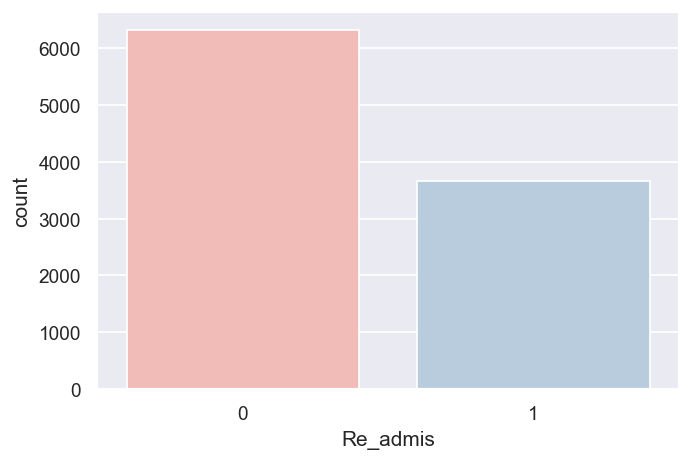

In [37]:
sns.countplot(data=df, x='Re_admis')

In [38]:
df.Initial_days.describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

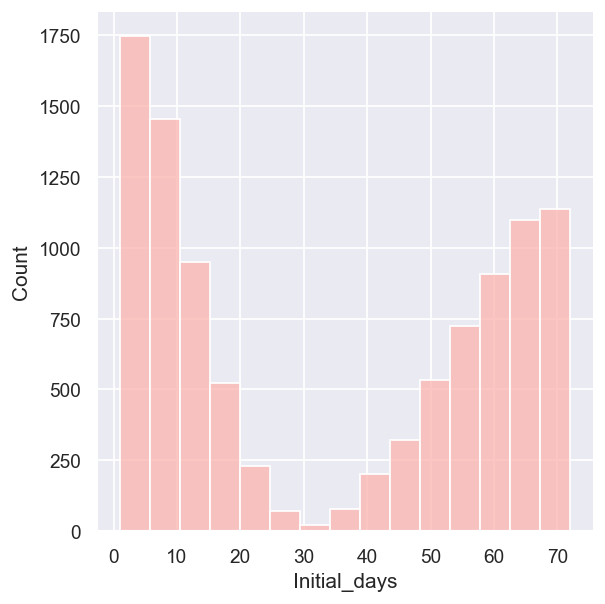

In [39]:
sns.displot(data=df, x='Initial_days')

In [40]:
df.Children.value_counts()

0     2548
1     2509
3     1489
2     1475
4      995
7      213
8      209
6      191
5      169
9      108
10      94
Name: Children, dtype: int64

<AxesSubplot:xlabel='Children', ylabel='count'>

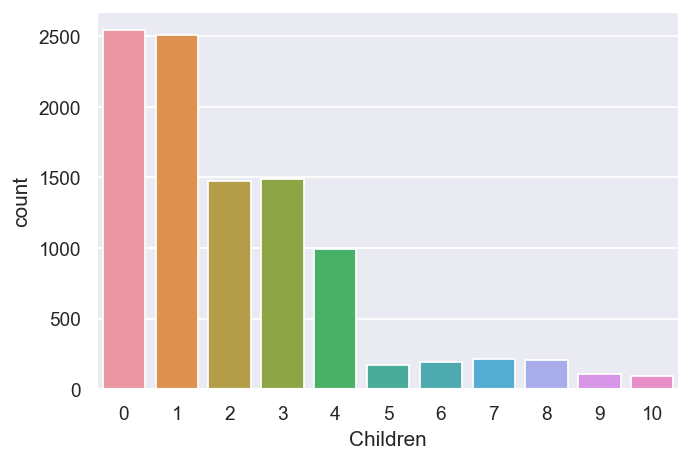

In [41]:
sns.countplot(data=df, x='Children')

In [42]:
df.Intravenous.value_counts()

0    6870
1    3130
Name: Intravenous, dtype: int64

<AxesSubplot:xlabel='Intravenous', ylabel='count'>

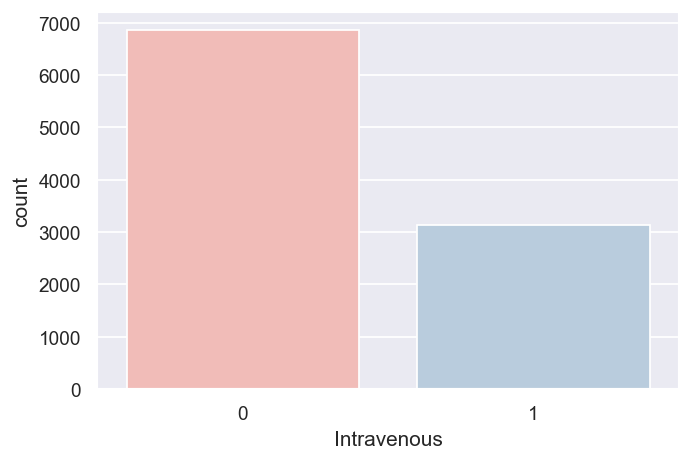

In [43]:
sns.countplot(data=df, x='Intravenous')

In [44]:
df.Population.describe()

count     10000.000000
mean      10117.506700
std       14921.742161
min           1.000000
25%         734.000000
50%        2874.000000
75%       14204.250000
max      122814.000000
Name: Population, dtype: float64

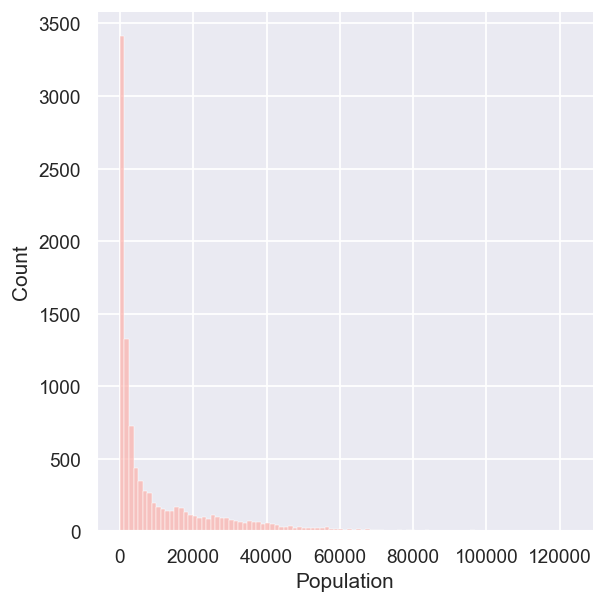

In [45]:
sns.displot(data=df, x='Population')

In [46]:
df.Asthma.value_counts()

0    7107
1    2893
Name: Asthma, dtype: int64

<AxesSubplot:xlabel='Asthma', ylabel='count'>

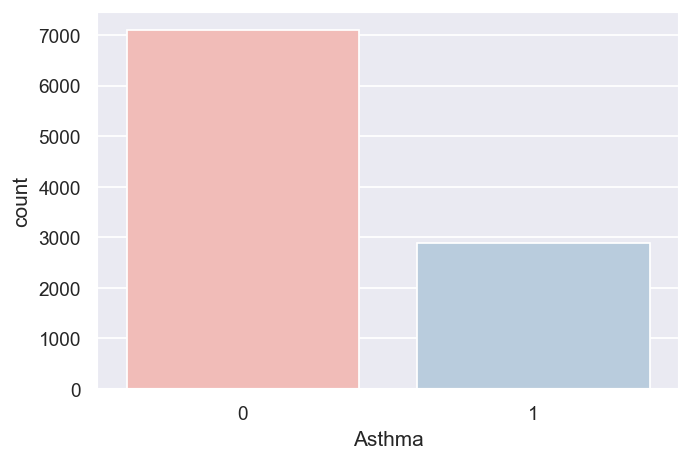

In [47]:
sns.countplot(data=df, x='Asthma')

In [48]:
df.Age.describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

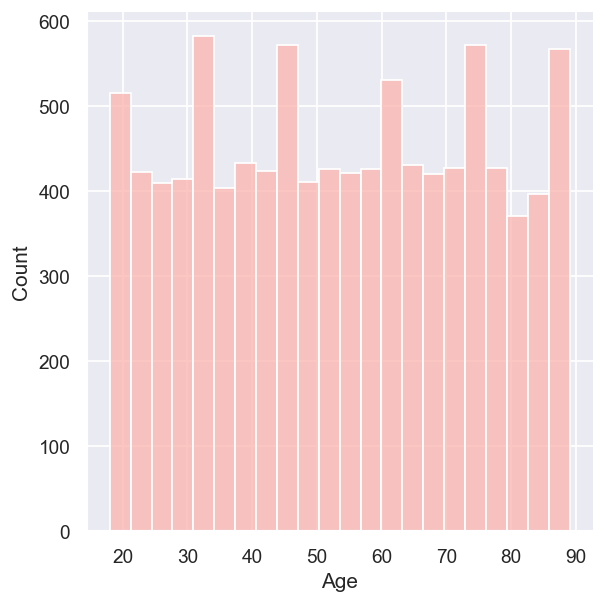

In [49]:
sns.displot(data=df, x='Age')

In [50]:
df.Back_pain.value_counts()

0    5886
1    4114
Name: Back_pain, dtype: int64

<AxesSubplot:xlabel='Back_pain', ylabel='count'>

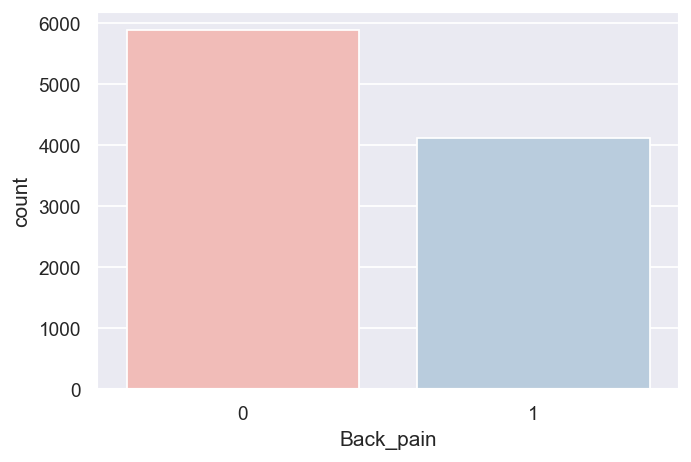

In [51]:
sns.countplot(data=df, x='Back_pain')

In [52]:
df.Full_meals_eaten.value_counts()

0    3715
1    3615
2    1856
3     612
4     169
5      25
6       6
7       2
Name: Full_meals_eaten, dtype: int64

<AxesSubplot:xlabel='Full_meals_eaten', ylabel='count'>

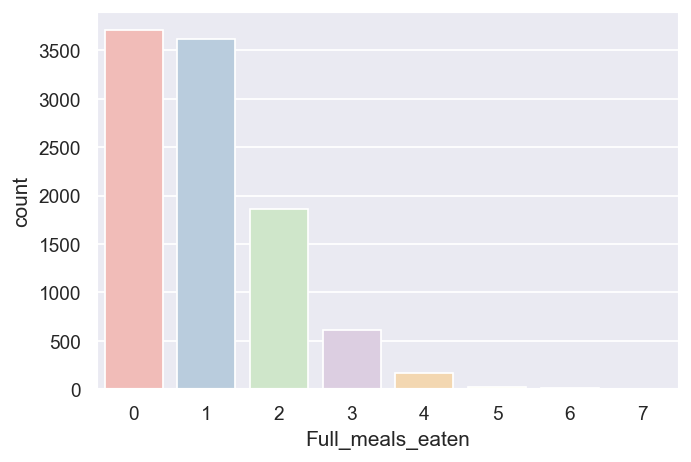

In [53]:
sns.countplot(data=df, x='Full_meals_eaten')

In [54]:
df.Observation_admission.value_counts()

0    7564
1    2436
Name: Observation_admission, dtype: int64

<AxesSubplot:xlabel='Observation_admission', ylabel='count'>

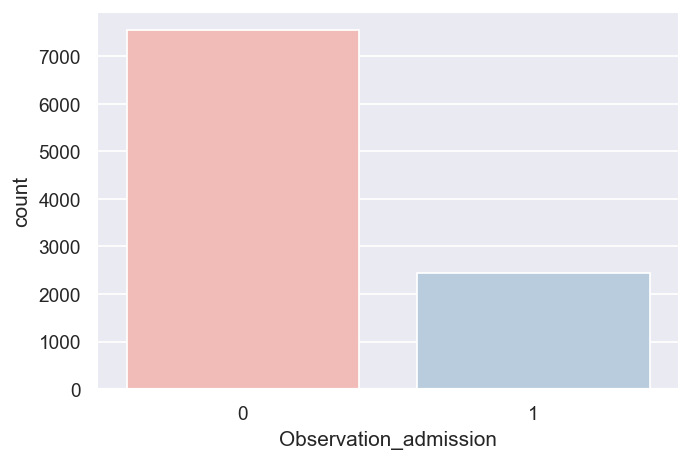

In [55]:
sns.countplot(data=df, x='Observation_admission')

In [56]:
df.Female.value_counts()

1    5018
0    4982
Name: Female, dtype: int64

<AxesSubplot:xlabel='Female', ylabel='count'>

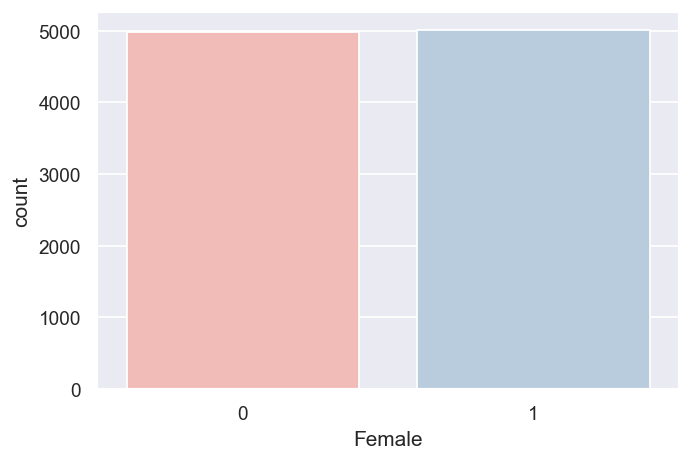

In [57]:
sns.countplot(data=df, x='Female')

In [58]:
df.Income.describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

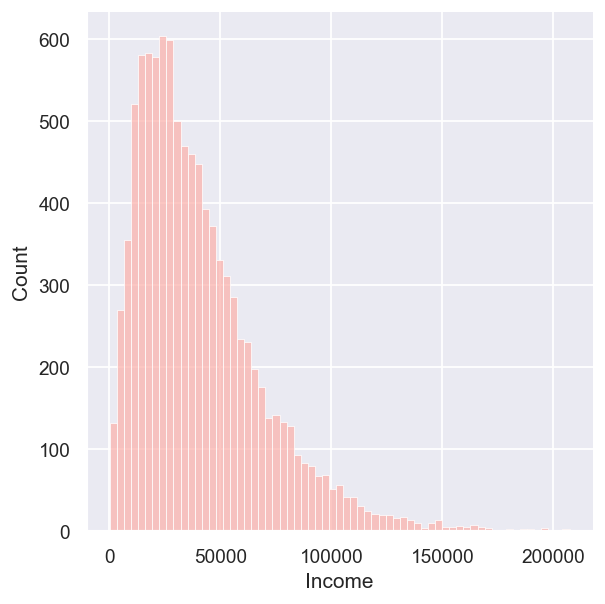

In [59]:
sns.displot(data=df, x='Income')

In [60]:
df.vitD_supp.value_counts()

0    6702
1    2684
2     544
3      64
4       5
5       1
Name: vitD_supp, dtype: int64

<AxesSubplot:xlabel='vitD_supp', ylabel='count'>

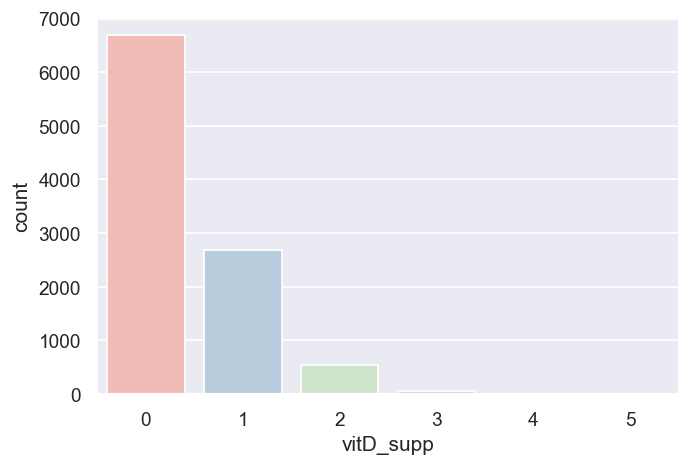

In [61]:
sns.countplot(data=df, x='vitD_supp')

In [62]:
df.Elective_admission.value_counts()

0    7496
1    2504
Name: Elective_admission, dtype: int64

<AxesSubplot:xlabel='Elective_admission', ylabel='count'>

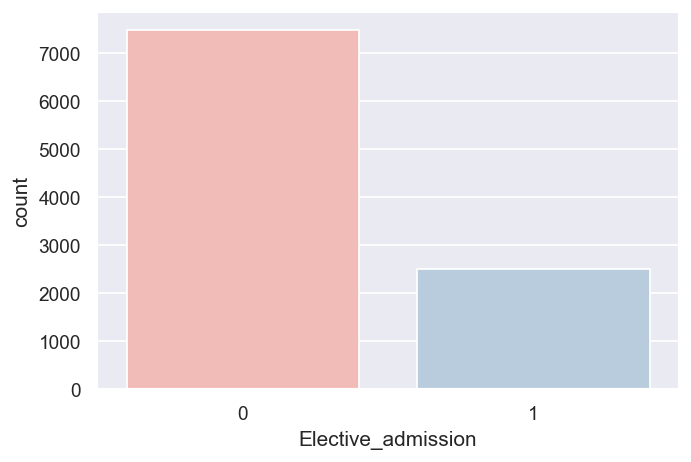

In [63]:
sns.countplot(data=df, x='Elective_admission')

### Bivariate

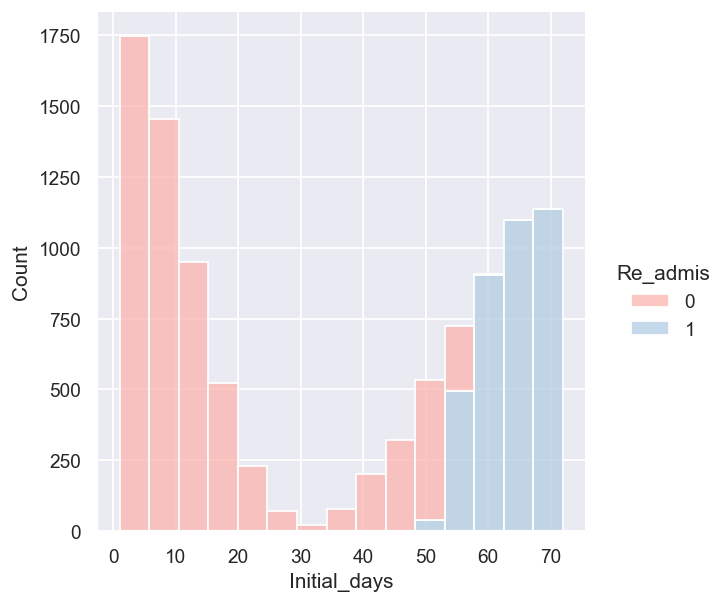

In [64]:
sns.displot(data=df, x='Initial_days', hue='Re_admis', multiple='stack')

<AxesSubplot:xlabel='Children', ylabel='count'>

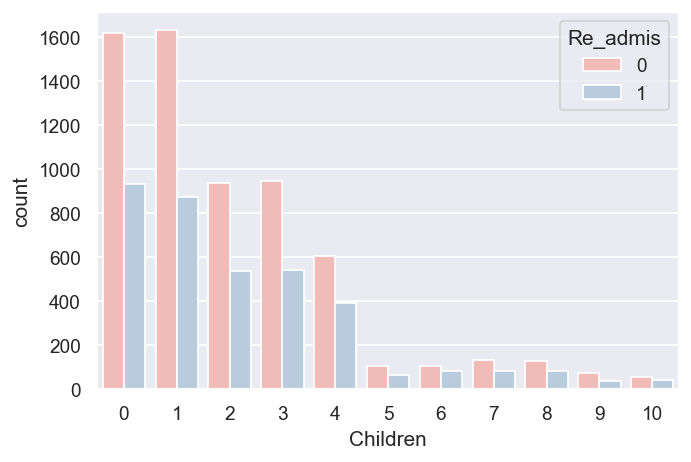

In [65]:
sns.countplot(data=df, x='Children', hue='Re_admis')

<AxesSubplot:xlabel='Intravenous', ylabel='count'>

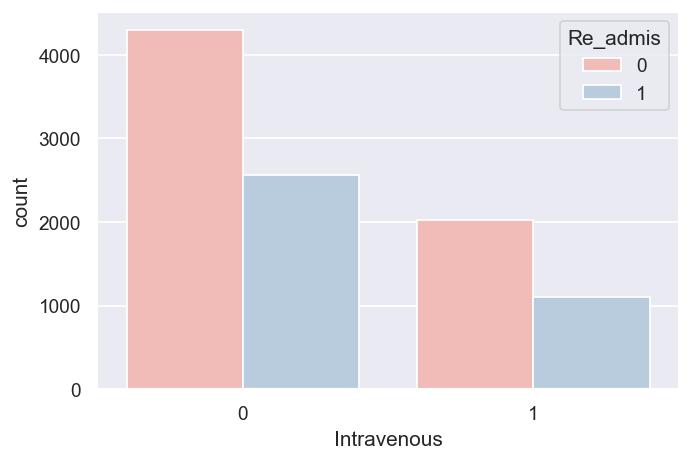

In [66]:
sns.countplot(data=df, x='Intravenous', hue='Re_admis')

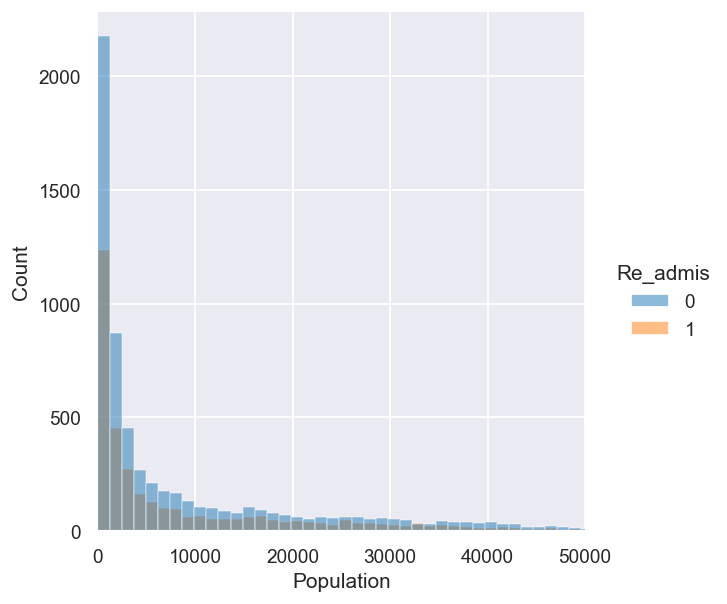

In [67]:
ax = sns.displot(data=df, x='Population', hue='Re_admis', multiple='layer', palette='tab10')
ax.set(xlim=(0, 50000))

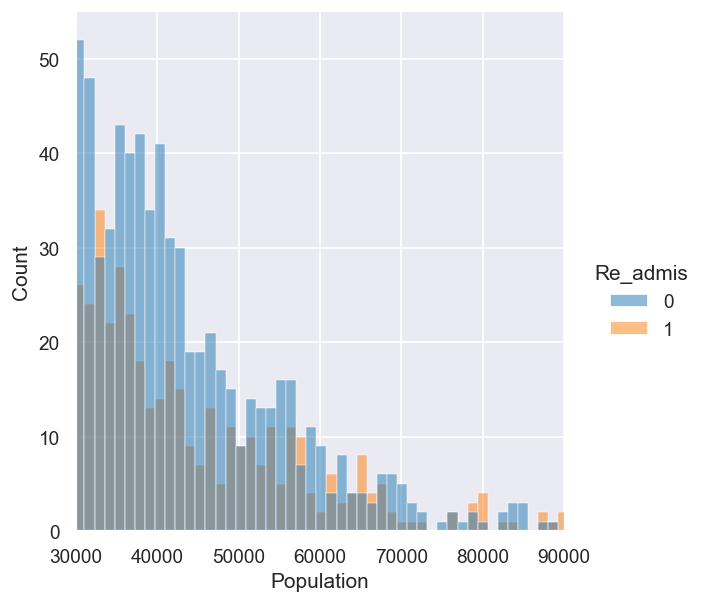

In [68]:
ax = sns.displot(data=df, x='Population', hue='Re_admis', multiple='layer', palette='tab10')
ax.set(xlim=(30000, 90000), ylim=(0, 55))

<AxesSubplot:xlabel='Asthma', ylabel='count'>

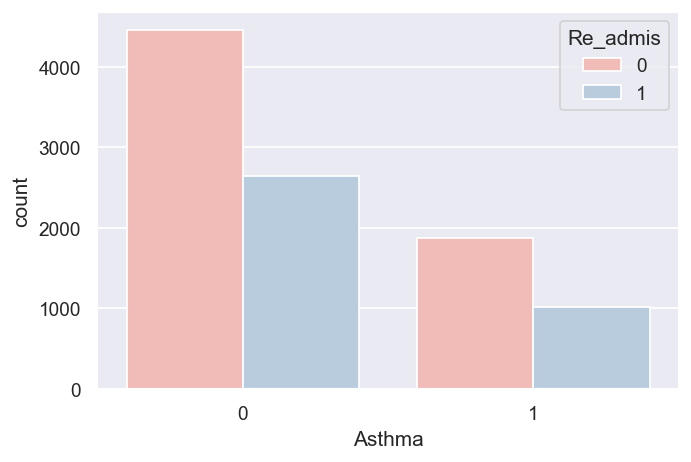

In [69]:
sns.countplot(data=df, x='Asthma', hue='Re_admis')

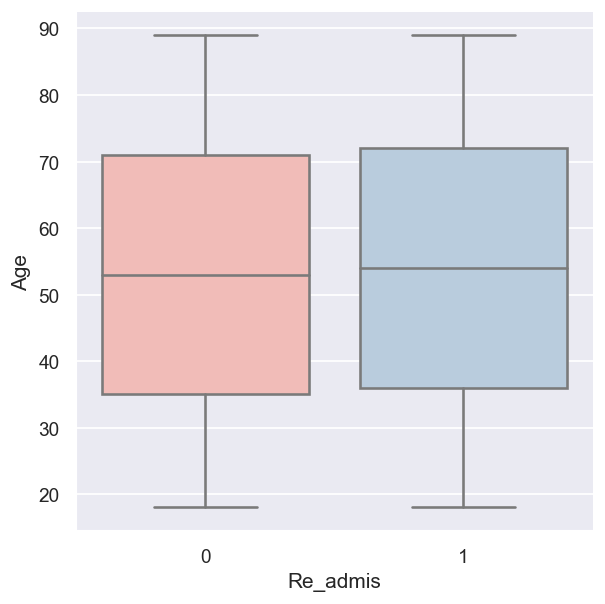

In [70]:
sns.catplot(data=df, x='Re_admis', y='Age', kind='box')

<AxesSubplot:xlabel='Back_pain', ylabel='count'>

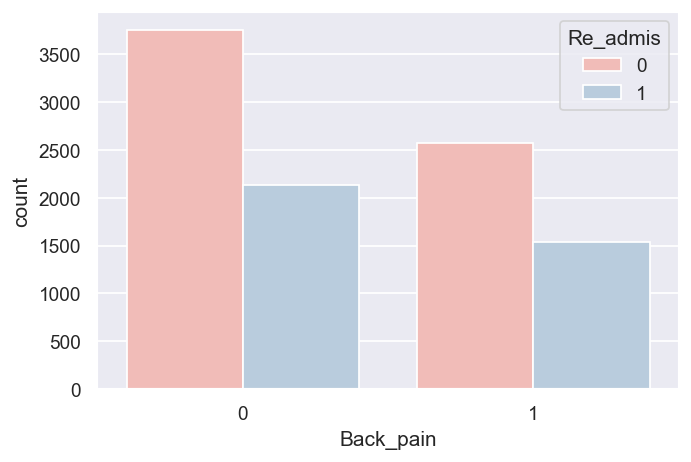

In [71]:
sns.countplot(data=df, x='Back_pain', hue='Re_admis')

<AxesSubplot:xlabel='Full_meals_eaten', ylabel='count'>

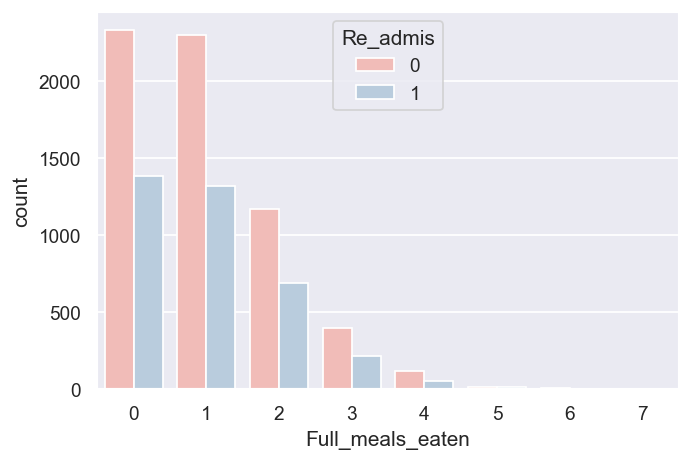

In [72]:
sns.countplot(data=df, x='Full_meals_eaten', hue='Re_admis')

<AxesSubplot:xlabel='Observation_admission', ylabel='count'>

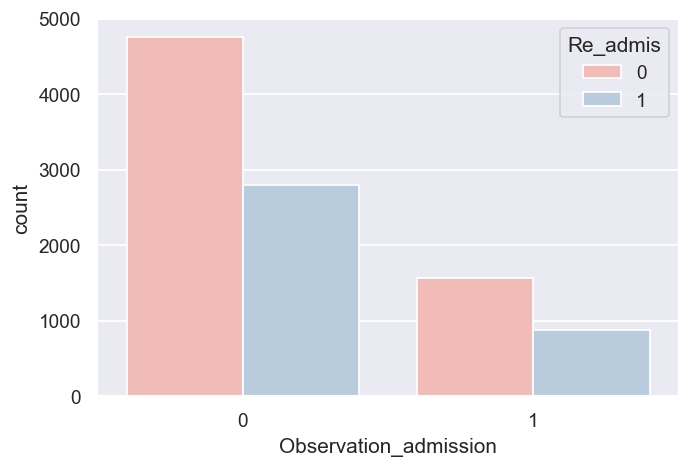

In [73]:
sns.countplot(data=df, x='Observation_admission', hue='Re_admis')

<AxesSubplot:xlabel='Female', ylabel='count'>

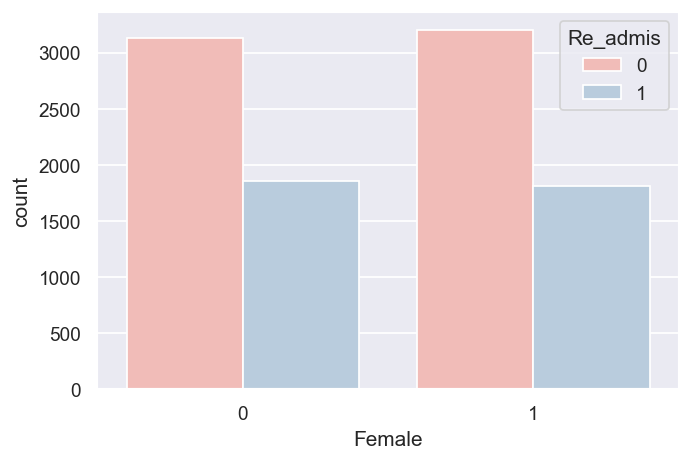

In [74]:
sns.countplot(data=df, x='Female', hue='Re_admis')

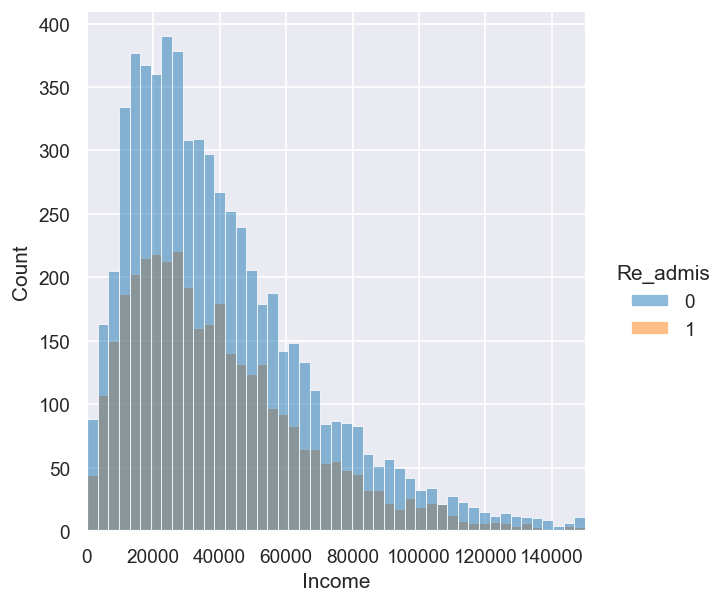

In [75]:
ax = sns.displot(data=df, x='Income', hue='Re_admis', multiple='layer', palette='tab10')
ax.set(xlim=(0, 150000))

<AxesSubplot:xlabel='vitD_supp', ylabel='count'>

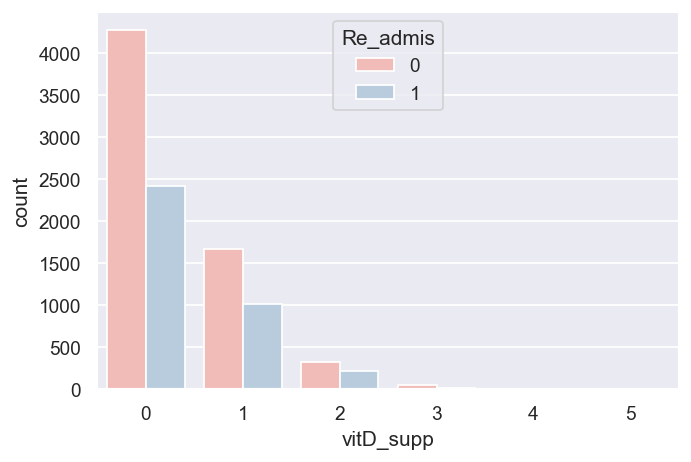

In [76]:
sns.countplot(data=df, x='vitD_supp', hue='Re_admis')

<AxesSubplot:xlabel='Elective_admission', ylabel='count'>

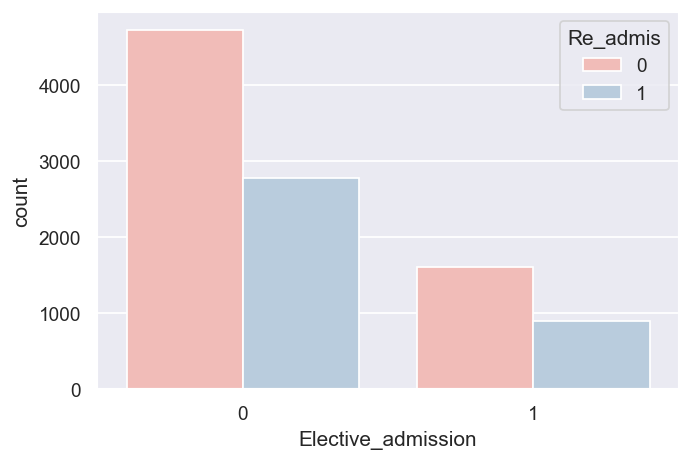

In [77]:
sns.countplot(data=df, x='Elective_admission', hue='Re_admis')

# Part IV: Model Comparison and Analysis

In [78]:
def createFormula(predictors):
    formula = 'Re_admis ~ '
    for i in range(len(predictors)):
        formula = formula + predictors[i] + ' + '
    formula = formula[:-3]
    return formula

## Initial Model

In [97]:
predictors = ['Initial_days', 'Children', 'Intravenous',
              'Population', 'Asthma','Age', 'Back_pain', 
              'Full_meals_eaten','Observation_admission',
              'Female', 'Income', 'vitD_supp',
              'Elective_admission']

In [98]:
formula = createFormula(predictors)
formula

'Re_admis ~ Initial_days + Children + Intravenous + Population + Asthma + Age + Back_pain + Full_meals_eaten + Observation_admission + Female + Income + vitD_supp + Elective_admission'

In [99]:
init_model = smf.logit(formula, data=df).fit()
init_model.summary()

Optimization terminated successfully.
         Current function value: 0.042840
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Re_admis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Sat, 17 Sep 2022   Pseudo R-squ.:                  0.9348
Time:                        17:38:07   Log-Likelihood:                -428.40
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -60.1214      2.955    -20.345      0.000     -65.913     -54.329
Initial_days              1.1246      0.055     20.465      0.000       1.017       1.232
Children                  0.0640      0.039      1.641      0.101      -0.012       0.140
Intravenous              -0.4768      0.193     -2.474      0.013      -0.855      -0.099
Population              7.88e-06   6.23e-06      1.264      0.206   -4.34e-06    2.01e-05
Asthma                   -1.0761      0.200     -5.369      0.000      -1.469      -0.683
Age                       0.0009      0.004      0.218      0.827      -0.007       0.009
Back_pain                 0.2308      0.178      1.293      0.196      -0.119       0.581
Full_meals_eaten          0.0515      0.090      0.574      0.566      -0.124       0.228
Observation_admission    -1.2101      0.221     -5.487      0.000      -1.642      -0.778
Female                   -0.2551      0.177     -1.438      0.151      -0.603       0.093
Income                 6.668e-08   3.17e-06      0.021      0.983   -6.14e-06    6.28e-06
vitD_supp                -0.0277      0.139     -0.200      0.842      -0.300       0.244
Elective_admission       -1.8549      0.230     -8.047      0.000      -2.307      -1.403
=========================================================================================

Possibly complete quasi-separation: A fraction 0.77 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [100]:
init_model.aic

884.8093730210248

 ## Model Reduction

In [103]:
# dropping statistically insignificant predictors
signif_predictors = ['Initial_days', 'Intravenous', 'Asthma',
              'Observation_admission', 'Elective_admission']

signif_formula = createFormula(signif_predictors)

In [104]:
signif_model = smf.logit(signif_formula, data=df).fit()
signif_model.summary()

Optimization terminated successfully.
         Current function value: 0.043289
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Re_admis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Sat, 17 Sep 2022   Pseudo R-squ.:                  0.9341
Time:                        17:38:36   Log-Likelihood:                -432.89
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -59.6418      2.919    -20.430      0.000     -65.364     -53.920
Initial_days              1.1203      0.055     20.522      0.000       1.013       1.227
Intravenous              -0.4328      0.190     -2.275      0.023      -0.806      -0.060
Asthma                   -1.0602      0.198     -5.350      0.000      -1.449      -0.672
Observation_admission    -1.2035      0.220     -5.483      0.000      -1.634      -0.773
Elective_admission       -1.8274      0.227     -8.039      0.000      -2.273      -1.382
=========================================================================================

Possibly complete quasi-separation: A fraction 0.77 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [105]:
signif_model.aic

877.7832205330221

In [86]:
def backward_select(initial_model):
    model_holder = pd.DataFrame()
    model_holder['vars'] = pd.Series(dtype='object')
    model_holder['aic'] = pd.Series(dtype='float')
    model_holder['removed'] = pd.Series(dtype='object')
    model_holder['model'] = pd.Series(dtype='object')
    
    predictors = initial_model.params.keys().tolist()
    predictors.pop(0)
    reduced_model = initial_model
    
    for i in range(len(predictors)):
        #clear dataframe
        model_holder = model_holder[0:0]
        
        for j in range(len(predictors)):
            temp_list = predictors.copy()
            removed = temp_list.pop(j)
            temp_formula = createFormula(temp_list)
            result = smf.logit(temp_formula, data=df).fit()
            entry = pd.DataFrame([{'vars': temp_list, 'aic': result.aic, 'removed': removed, 'model': result}])
            model_holder = pd.concat([model_holder, entry], axis=0, ignore_index=True)
            
        model_holder = model_holder.sort_values(by=['aic'], ascending=True)
        display(model_holder)
        best_model = model_holder.iloc[0, :]
        diff = best_model.aic - reduced_model.aic
        
        if(diff >= 0):
            print(f"The removal of {best_model.removed} did not positively affect the AIC of the model.")
            print(f"The final reduced model is made up of these predictors: {predictors}")
            break
        
        print(f"The removal of {best_model.removed} positively affected the AIC of the model by {diff}\n")
        predictors = best_model.vars
        reduced_model = best_model.model
    return reduced_model

In [87]:
further_reduced = backward_select(signif_model)

Optimization terminated successfully.
         Current function value: 0.656735
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.043549
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.044790
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.044862
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.046908
         Iterations 13


,vars,aic,removed,model
1,"[Initial_days, Asthma, Observation_admission, ...",880.989972,Intravenous,<statsmodels.discrete.discrete_model.BinaryRes...
2,"[Initial_days, Intravenous, Observation_admiss...",905.805932,Asthma,<statsmodels.discrete.discrete_model.BinaryRes...
3,"[Initial_days, Intravenous, Asthma, Elective_a...",907.245910,Observation_admission,<statsmodels.discrete.discrete_model.BinaryRes...
4,"[Initial_days, Intravenous, Asthma, Observatio...",948.158742,Elective_admission,<statsmodels.discrete.discrete_model.BinaryRes...
0,"[Intravenous, Asthma, Observation_admission, E...",13144.700741,Initial_days,<statsmodels.discrete.discrete_model.BinaryRes...


The removal of Intravenous did not positively affect the AIC of the model.
The final reduced model is made up of these predictors: ['Initial_days', 'Intravenous', 'Asthma', 'Observation_admission', 'Elective_admission']


In [88]:
init_reduced = backward_select(init_model)

Optimization terminated successfully.
         Current function value: 0.655809
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.042976
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.043149
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.042922
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.044356
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.042843
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.042924
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.042857
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.044418
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.0

,vars,aic,removed,model
10,"[Initial_days, Children, Intravenous, Populati...",882.809816,Income,<statsmodels.discrete.discrete_model.BinaryRes...
11,"[Initial_days, Children, Intravenous, Populati...",882.849330,vitD_supp,<statsmodels.discrete.discrete_model.BinaryRes...
5,"[Initial_days, Children, Intravenous, Populati...",882.856931,Age,<statsmodels.discrete.discrete_model.BinaryRes...
7,"[Initial_days, Children, Intravenous, Populati...",883.139349,Full_meals_eaten,<statsmodels.discrete.discrete_model.BinaryRes...
3,"[Initial_days, Children, Intravenous, Asthma, ...",884.430357,Population,<statsmodels.discrete.discrete_model.BinaryRes...
6,"[Initial_days, Children, Intravenous, Populati...",884.487013,Back_pain,<statsmodels.discrete.discrete_model.BinaryRes...
9,"[Initial_days, Children, Intravenous, Populati...",884.880985,Female,<statsmodels.discrete.discrete_model.BinaryRes...
1,"[Initial_days, Intravenous, Population, Asthma...",885.515165,Children,<statsmodels.discrete.discrete_model.BinaryRes...
2,"[Initial_days, Children, Population, Asthma, A...",888.978558,Intravenous,<statsmodels.discrete.discrete_model.BinaryRes...
4,"[Initial_days, Children, Intravenous, Populati...",913.125287,Asthma,<statsmodels.discrete.discrete_model.BinaryRes...


The removal of Income positively affected the AIC of the model by -1.9995571689948974

Optimization terminated successfully.
         Current function value: 0.655873
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.042976
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.043149
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.042922
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.044357
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.042843
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.042925
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.042857
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.044418
         I

,vars,aic,removed,model
10,"[Initial_days, Children, Intravenous, Populati...",880.850496,vitD_supp,<statsmodels.discrete.discrete_model.BinaryRes...
5,"[Initial_days, Children, Intravenous, Populati...",880.857041,Age,<statsmodels.discrete.discrete_model.BinaryRes...
7,"[Initial_days, Children, Intravenous, Populati...",881.139767,Full_meals_eaten,<statsmodels.discrete.discrete_model.BinaryRes...
3,"[Initial_days, Children, Intravenous, Asthma, ...",882.430598,Population,<statsmodels.discrete.discrete_model.BinaryRes...
6,"[Initial_days, Children, Intravenous, Populati...",882.492258,Back_pain,<statsmodels.discrete.discrete_model.BinaryRes...
9,"[Initial_days, Children, Intravenous, Populati...",882.880988,Female,<statsmodels.discrete.discrete_model.BinaryRes...
1,"[Initial_days, Intravenous, Population, Asthma...",883.519854,Children,<statsmodels.discrete.discrete_model.BinaryRes...
2,"[Initial_days, Children, Population, Asthma, A...",886.979462,Intravenous,<statsmodels.discrete.discrete_model.BinaryRes...
4,"[Initial_days, Children, Intravenous, Populati...",911.131174,Asthma,<statsmodels.discrete.discrete_model.BinaryRes...
8,"[Initial_days, Children, Intravenous, Populati...",912.353940,Observation_admission,<statsmodels.discrete.discrete_model.BinaryRes...


The removal of vitD_supp positively affected the AIC of the model by -1.9593197082415372

Optimization terminated successfully.
         Current function value: 0.655925
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.042980
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.043151
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.042924
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.044361
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.042845
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.042927
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.042859
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.044421
       

,vars,aic,removed,model
5,"[Initial_days, Children, Intravenous, Populati...",878.898634,Age,<statsmodels.discrete.discrete_model.BinaryRes...
7,"[Initial_days, Children, Intravenous, Populati...",879.183753,Full_meals_eaten,<statsmodels.discrete.discrete_model.BinaryRes...
3,"[Initial_days, Children, Intravenous, Asthma, ...",880.473103,Population,<statsmodels.discrete.discrete_model.BinaryRes...
6,"[Initial_days, Children, Intravenous, Populati...",880.549565,Back_pain,<statsmodels.discrete.discrete_model.BinaryRes...
9,"[Initial_days, Children, Intravenous, Populati...",880.892128,Female,<statsmodels.discrete.discrete_model.BinaryRes...
1,"[Initial_days, Intravenous, Population, Asthma...",881.592385,Children,<statsmodels.discrete.discrete_model.BinaryRes...
2,"[Initial_days, Children, Population, Asthma, A...",885.023871,Intravenous,<statsmodels.discrete.discrete_model.BinaryRes...
4,"[Initial_days, Children, Intravenous, Populati...",909.217884,Asthma,<statsmodels.discrete.discrete_model.BinaryRes...
8,"[Initial_days, Children, Intravenous, Populati...",910.410142,Observation_admission,<statsmodels.discrete.discrete_model.BinaryRes...
10,"[Initial_days, Children, Intravenous, Populati...",952.213567,Elective_admission,<statsmodels.discrete.discrete_model.BinaryRes...


The removal of Age positively affected the AIC of the model by -1.9518624493250627

Optimization terminated successfully.
         Current function value: 0.656059
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.042982
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.043152
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.042927
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.044363
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.042931
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.042862
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.044421
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.042945
         Iter

,vars,aic,removed,model
6,"[Initial_days, Children, Intravenous, Populati...",877.235697,Full_meals_eaten,<statsmodels.discrete.discrete_model.BinaryRes...
3,"[Initial_days, Children, Intravenous, Asthma, ...",878.537996,Population,<statsmodels.discrete.discrete_model.BinaryRes...
5,"[Initial_days, Children, Intravenous, Populati...",878.610051,Back_pain,<statsmodels.discrete.discrete_model.BinaryRes...
8,"[Initial_days, Children, Intravenous, Populati...",878.906629,Female,<statsmodels.discrete.discrete_model.BinaryRes...
1,"[Initial_days, Intravenous, Population, Asthma...",879.648925,Children,<statsmodels.discrete.discrete_model.BinaryRes...
2,"[Initial_days, Children, Population, Asthma, B...",883.046096,Intravenous,<statsmodels.discrete.discrete_model.BinaryRes...
4,"[Initial_days, Children, Intravenous, Populati...",907.255772,Asthma,<statsmodels.discrete.discrete_model.BinaryRes...
7,"[Initial_days, Children, Intravenous, Populati...",908.425816,Observation_admission,<statsmodels.discrete.discrete_model.BinaryRes...
9,"[Initial_days, Children, Intravenous, Populati...",950.215365,Elective_admission,<statsmodels.discrete.discrete_model.BinaryRes...
0,"[Children, Intravenous, Population, Asthma, Ba...",13141.180058,Initial_days,<statsmodels.discrete.discrete_model.BinaryRes...


The removal of Full_meals_eaten positively affected the AIC of the model by -1.6629366853123884

Optimization terminated successfully.
         Current function value: 0.656123
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.043002
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.043169
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.042943
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.044368
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.042946
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.044446
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.042963
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.046545


,vars,aic,removed,model
3,"[Initial_days, Children, Intravenous, Asthma, ...",876.869840,Population,<statsmodels.discrete.discrete_model.BinaryRes...
5,"[Initial_days, Children, Intravenous, Populati...",876.916123,Back_pain,<statsmodels.discrete.discrete_model.BinaryRes...
7,"[Initial_days, Children, Intravenous, Populati...",877.263072,Female,<statsmodels.discrete.discrete_model.BinaryRes...
1,"[Initial_days, Intravenous, Population, Asthma...",878.046695,Children,<statsmodels.discrete.discrete_model.BinaryRes...
2,"[Initial_days, Children, Population, Asthma, B...",881.375513,Intravenous,<statsmodels.discrete.discrete_model.BinaryRes...
4,"[Initial_days, Children, Intravenous, Populati...",905.361249,Asthma,<statsmodels.discrete.discrete_model.BinaryRes...
6,"[Initial_days, Children, Intravenous, Populati...",906.919603,Observation_admission,<statsmodels.discrete.discrete_model.BinaryRes...
8,"[Initial_days, Children, Intravenous, Populati...",948.905341,Elective_admission,<statsmodels.discrete.discrete_model.BinaryRes...
0,"[Children, Intravenous, Population, Asthma, Ba...",13140.466669,Initial_days,<statsmodels.discrete.discrete_model.BinaryRes...


The removal of Population positively affected the AIC of the model by -0.365857314047048

Optimization terminated successfully.
         Current function value: 0.656295
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.043096
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.043250
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.044447
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.043026
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.044537
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.043042
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.046597
         Iterations 13


,vars,aic,removed,model
4,"[Initial_days, Children, Intravenous, Asthma, ...",876.514342,Back_pain,<statsmodels.discrete.discrete_model.BinaryRes...
6,"[Initial_days, Children, Intravenous, Asthma, ...",876.848003,Female,<statsmodels.discrete.discrete_model.BinaryRes...
1,"[Initial_days, Intravenous, Asthma, Back_pain,...",877.925468,Children,<statsmodels.discrete.discrete_model.BinaryRes...
2,"[Initial_days, Children, Asthma, Back_pain, Ob...",881.006075,Intravenous,<statsmodels.discrete.discrete_model.BinaryRes...
3,"[Initial_days, Children, Intravenous, Back_pai...",904.939390,Asthma,<statsmodels.discrete.discrete_model.BinaryRes...
5,"[Initial_days, Children, Intravenous, Asthma, ...",906.741235,Observation_admission,<statsmodels.discrete.discrete_model.BinaryRes...
7,"[Initial_days, Children, Intravenous, Asthma, ...",947.930195,Elective_admission,<statsmodels.discrete.discrete_model.BinaryRes...
0,"[Children, Intravenous, Asthma, Back_pain, Obs...",13141.891303,Initial_days,<statsmodels.discrete.discrete_model.BinaryRes...


The removal of Back_pain positively affected the AIC of the model by -0.3554981377343438

Optimization terminated successfully.
         Current function value: 0.656387
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.043175
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.043330
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.044540
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.044628
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.043125
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.046692
         Iterations 13


,vars,aic,removed,model
5,"[Initial_days, Children, Intravenous, Asthma, ...",876.500991,Female,<statsmodels.discrete.discrete_model.BinaryRes...
1,"[Initial_days, Intravenous, Asthma, Observatio...",877.490592,Children,<statsmodels.discrete.discrete_model.BinaryRes...
2,"[Initial_days, Children, Asthma, Observation_a...",880.609885,Intravenous,<statsmodels.discrete.discrete_model.BinaryRes...
3,"[Initial_days, Children, Intravenous, Observat...",904.805859,Asthma,<statsmodels.discrete.discrete_model.BinaryRes...
4,"[Initial_days, Children, Intravenous, Asthma, ...",906.550313,Observation_admission,<statsmodels.discrete.discrete_model.BinaryRes...
6,"[Initial_days, Children, Intravenous, Asthma, ...",947.839117,Elective_admission,<statsmodels.discrete.discrete_model.BinaryRes...
0,"[Children, Intravenous, Asthma, Observation_ad...",13141.738083,Initial_days,<statsmodels.discrete.discrete_model.BinaryRes...


The removal of Female positively affected the AIC of the model by -0.013350286315471749

Optimization terminated successfully.
         Current function value: 0.656458
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.043289
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.043404
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.044608
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.044712
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.046756
         Iterations 13


,vars,aic,removed,model
1,"[Initial_days, Intravenous, Asthma, Observatio...",877.783221,Children,<statsmodels.discrete.discrete_model.BinaryRes...
2,"[Initial_days, Children, Asthma, Observation_a...",880.078698,Intravenous,<statsmodels.discrete.discrete_model.BinaryRes...
3,"[Initial_days, Children, Intravenous, Observat...",904.158166,Asthma,<statsmodels.discrete.discrete_model.BinaryRes...
4,"[Initial_days, Children, Intravenous, Asthma, ...",906.239166,Observation_admission,<statsmodels.discrete.discrete_model.BinaryRes...
5,"[Initial_days, Children, Intravenous, Asthma, ...",947.111175,Elective_admission,<statsmodels.discrete.discrete_model.BinaryRes...
0,"[Children, Intravenous, Asthma, Observation_ad...",13141.154273,Initial_days,<statsmodels.discrete.discrete_model.BinaryRes...


The removal of Children did not positively affect the AIC of the model.
The final reduced model is made up of these predictors: ['Initial_days', 'Children', 'Intravenous', 'Asthma', 'Observation_admission', 'Elective_admission']


In [89]:
init_model.aic

884.8093730210248

In [90]:
init_reduced.aic

876.5009912710541

In [91]:
signif_model.aic

877.7832205330221

In [92]:
init_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Re_admis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Sat, 17 Sep 2022   Pseudo R-squ.:                  0.9348
Time:                        17:36:46   Log-Likelihood:                -428.40
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -60.1214      2.955    -20.345      0.000     -65.913     -54.329
Initial_days              1.1246      0.055     20.465      0.000       1.017       1.232
Children                  0.0640      0.039      1.641      0.101      -0.012       0.140
Intravenous              -0.4768      0.193     -2.474      0.013      -0.855      -0.099
Population              7.88e-06   6.23e-06      1.264      0.206   -4.34e-06    2.01e-05
Asthma                   -1.0761      0.200     -5.369      0.000      -1.469      -0.683
Age                       0.0009      0.004      0.218      0.827      -0.007       0.009
Back_pain                 0.2308      0.178      1.293      0.196      -0.119       0.581
Full_meals_eaten          0.0515      0.090      0.574      0.566      -0.124       0.228
Observation_admission    -1.2101      0.221     -5.487      0.000      -1.642      -0.778
Female                   -0.2551      0.177     -1.438      0.151      -0.603       0.093
Income                 6.668e-08   3.17e-06      0.021      0.983   -6.14e-06    6.28e-06
vitD_supp                -0.0277      0.139     -0.200      0.842      -0.300       0.244
Elective_admission       -1.8549      0.230     -8.047      0.000      -2.307      -1.403
=========================================================================================

Possibly complete quasi-separation: A fraction 0.77 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [93]:
signif_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Re_admis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Sat, 17 Sep 2022   Pseudo R-squ.:                  0.9341
Time:                        17:36:46   Log-Likelihood:                -432.89
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -59.6418      2.919    -20.430      0.000     -65.364     -53.920
Initial_days              1.1203      0.055     20.522      0.000       1.013       1.227
Intravenous              -0.4328      0.190     -2.275      0.023      -0.806      -0.060
Asthma                   -1.0602      0.198     -5.350      0.000      -1.449      -0.672
Observation_admission    -1.2035      0.220     -5.483      0.000      -1.634      -0.773
Elective_admission       -1.8274      0.227     -8.039      0.000      -2.273      -1.382
=========================================================================================

Possibly complete quasi-separation: A fraction 0.77 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Confusion Matrix

In [94]:
confusion_matrix = signif_model.pred_table()
confusion_matrix

array([[6230.,  101.],
       [  82., 3587.]])

(<Figure size 750x500 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.629950248756219, 0.9807774957481274),
  ('0', '1'): (0.0, 0.98409975488434, 0.629950248756219, 0.015900245115659878),
  ('1', '0'): (0.6349253731343284,
   0.0,
   0.36507462686567166,
   0.022275163464385545),
  ('1', '1'): (0.6349253731343284,
   0.02559742260059817,
   0.36507462686567166,
   0.9744025773994017)})

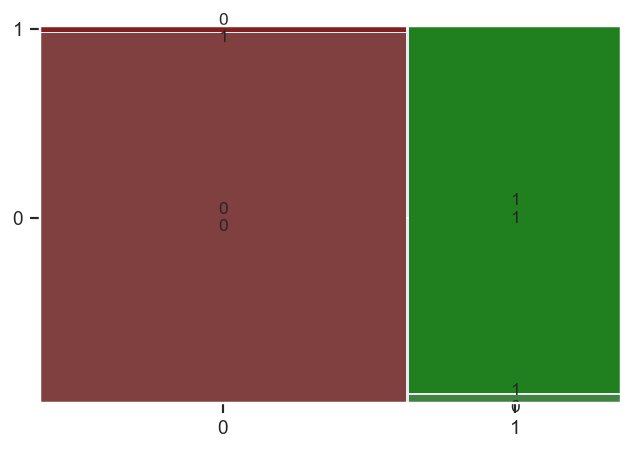

In [95]:
mosaic(confusion_matrix)

# Part V Data Summary and Implications

In [96]:
signif_model.params

Intercept               -59.641830
Initial_days              1.120265
Intravenous              -0.432846
Asthma                   -1.060204
Observation_admission    -1.203537
Elective_admission       -1.827389
dtype: float64

## Regression Equation


P(Re_admis) = e<sup>-59.642 + (1.120 * Initial_days) + (-0.433 * Intraveneous)  + (-1.060 * Asthma) + (-1.204 * Observation_admission) + (-1.827 * Elective_admission)</sup> / (1 + e<sup>-59.642 + (1.120 * Initial_days) + (-0.433 * Intraveneous)  + (-1.060 * Asthma) + (-1.204 * Observation_admission) + (-1.827 * Elective_admission)</sup>)

As the amount of days the patient stays for in their initial visit increases, the odds that they are later readmitted increases by about 206%!

If the primary service that the patient received was intravenous, then the chance of the patient being readmitted is reduced by about 35% compared to patients who received other primary services.

If the patient has asthma then the odds that they are later readmitted to the hospital is reduced by about 65%.

If the patient was admitted for observation, the odds that they are readmitted later on is 70% less than those who were admitted under emergency.

If the patient's initial admission was elective, the odds of readmission is 84% less than emergency admission patients.

When all of these variables are 0, the probability that the patient will be readmitted within a month is very close 0